# 전처리

In [4]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

In [5]:
#given cities
cities = []
#solution
sol = []

# Euclidean distance measuring function

In [6]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

# 데이터를 가져오기 및 확인

In [7]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        #print(row[0]) #0행의 숫자들
        sol.append(int(row[0]))
        if(len(sol) < 10):
            print(sol[0:5])
    print('#########################################################################')
    print(sol[0:15])

[760]
[760, 21]
[760, 21, 950]
[760, 21, 950, 122]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
#########################################################################
[760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656]


# 1. get solution sequence and reorfering (sort from 0)

In [8]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        sol.append(int(row[0]))
    print('The index of 0 is :',sol.index(0))    
    #reordering solution sequence
    idx = sol.index(0) # 0이라는 숫자의 index
    
    front = sol[idx:]
    back = sol[0:idx]
    
    print('The front 0~20 is : ',front[0:20])
    print('/////////////////////////////////////////////////////////////////////////////////////////////////////////////')
    print('The back 0~20 is : ',back[0: 20])
    sol = front + back
    
    #expand 0 city (start) for simplicity
    sol.append(int(0))

The index of 0 is : 189
The front 0~20 is :  [0, 934, 200, 370, 524, 262, 982, 902, 71, 806, 744, 958, 430, 153, 81, 140, 786, 837, 634, 259]
/////////////////////////////////////////////////////////////////////////////////////////////////////////////
The back 0~20 is :  [760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656, 29, 872, 753, 165, 948]


즉 0을 기준으로 앞과 뒤를 짤라서 0 부터 시작하게 끔 자르고 마지막은 0에 도달 해야 하니깐 0을 추가                            
ex) 1 2 3 0 4 5 6             
front = 0 4 5 6           
back = 1 2 3           
sol = 0 4 5 6 1 2 3         

sol.append(int(0)) 
->최종 결과 0 4 5 6 1 2 3 0

위의 예시에서는         
0 의 index 값이 189 이므로     
front 에 189 ~ 999 index에 해당하는 숫자가 들어가고        
back 에 0 ~ 188 index에 해당하는 숫자가 들어간다

# 2. get TSP city map

In [9]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:25])

cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216'], ['66.19318558706838', '55.68426760836053'], ['34.1551559598477', '85.84359753107817'], ['37.75840849411198', '8.948084373549136'], ['65.16521495804488', '93.65696789745532'], ['42.69022506258199', '92.09116283653597'], ['34.978245803048665', '90.63114224147267'], ['31.624449741999662', '37.20161513918061'], ['64.27557457661524', '47.52318749669915'], ['83.64758869867107', '0.8456953312116822'], ['66.90344399989151', '50.71682553053572'], ['16.884423905642787', '87.22366700571314'], ['87.5480501416314', '69.49436954110595'], ['5

# 3. evaluate solution cost

In [10]:
total_cost = 0

for idx in range(len(sol)-1): #0~ 999 까지
    
    #get city positions
    pos_city_1 = [float(cities[sol[idx]][0]), float(cities[sol[idx]][1])] #현재 node의 좌표를 float형으로 가져옴
    pos_city_2 = [float(cities[sol[idx+1]][0]), float(cities[sol[idx+1]][1])] #다음 node의 좌표를 float형으로 가져옴
    
    #distance calculation
    dist = distance(pos_city_1,pos_city_2) # 두 node 사이 의 거리를 구하여서
    
    #accumulation
    total_cost += dist # 토탈에 추가
    
print('final cost: ' +str(total_cost))

final cost: 102629.4310080144


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# Add Breadth First search for problem

In [11]:
#Breadth First Search를 먼저 정의(Queue를 통해 구현  -> 파이썬은 dequeue 이용)

# deque 연습

In [12]:
from collections import deque
queue = deque([1, 2, 3])
queue.append(4)
queue

deque([1, 2, 3, 4])

In [13]:
#popleft() 라는 메서드를 사용하면 list의 pop(0) 메서드와 같은 효과를 가진다
queue.popleft()

1

In [14]:
queue.popleft()

2

In [15]:
queue

deque([3, 4])

In [16]:
print("queue.pop() : " ,queue.pop(), "         queue after pop() : ", queue)

queue.pop() :  4          queue after pop() :  deque([3])


# node 수가 10개인 트리를 구현하기 위해서 군집화(k-clustering)을 사용하여 표본을 만들자

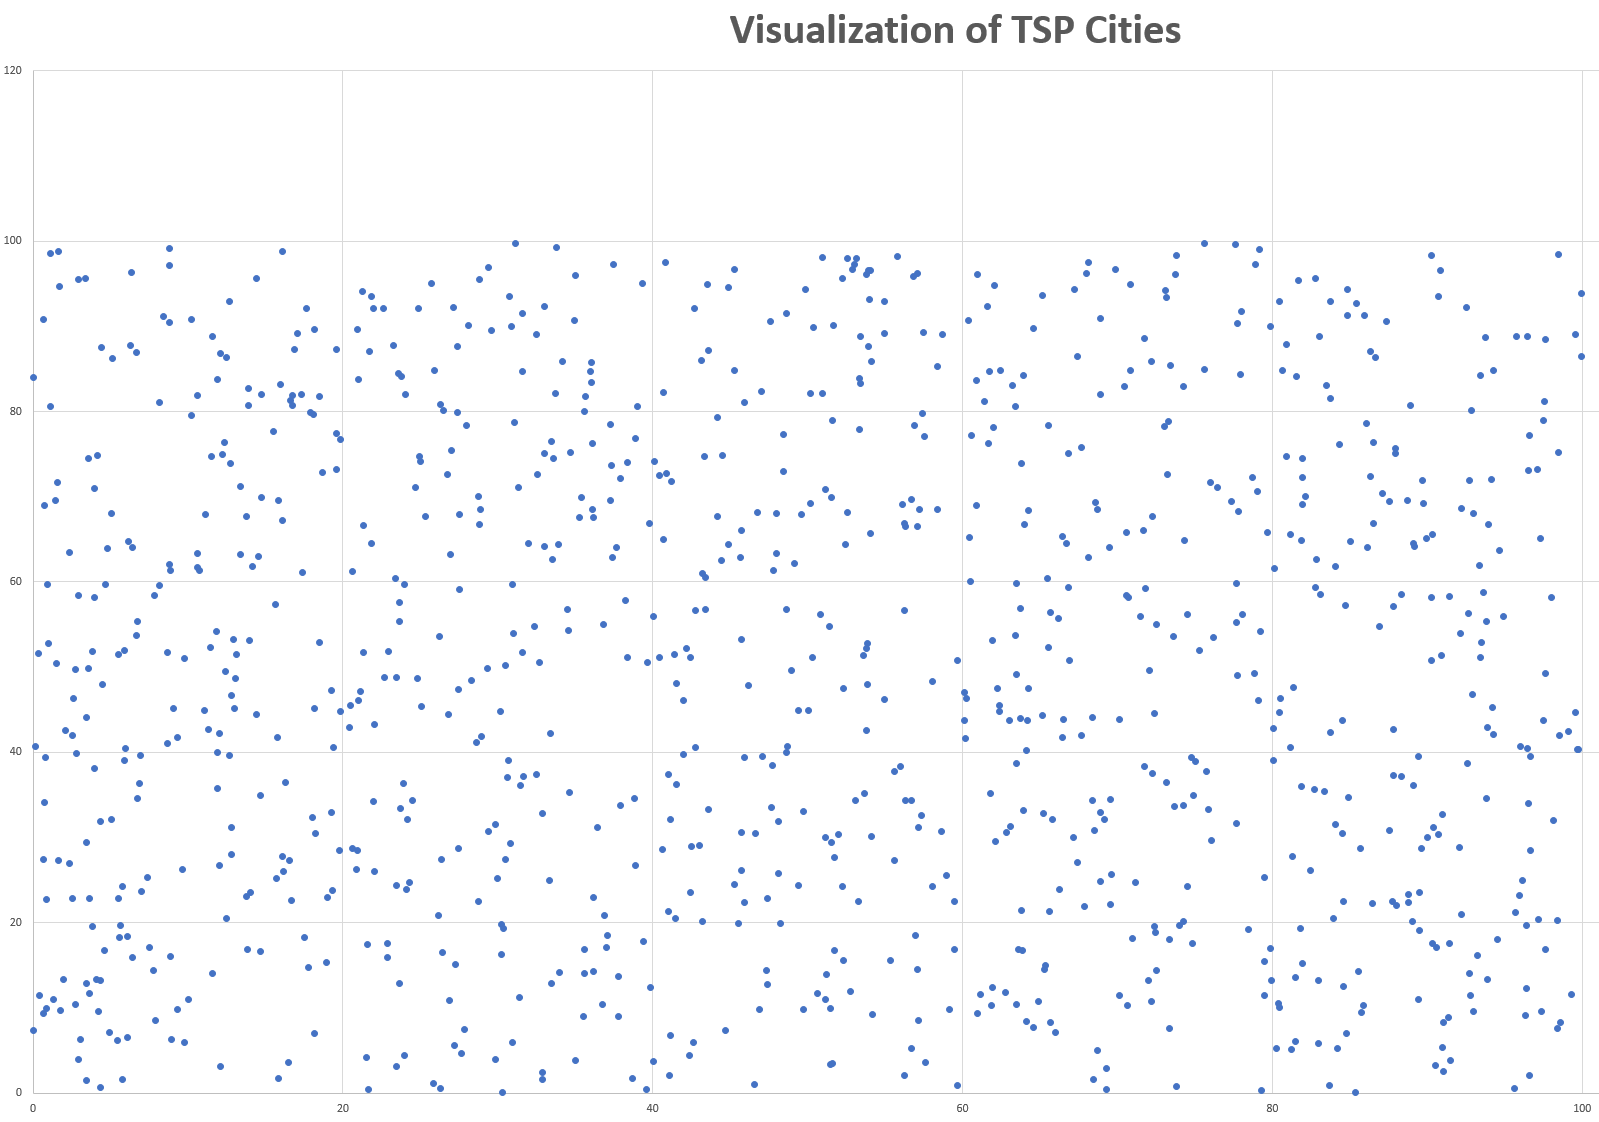

In [17]:
import PIL.Image as pilimg
pure_img = pilimg.open('visualization_cities.PNG')
pure_img

In [18]:
#우리의 데이터
print(cities[:3])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211']]


# k-means

In [19]:
from sklearn.cluster import KMeans
k= 10 # 클러스터의 개수를 미리 지정(0~9)
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

y_pred의 개수 :  1000
[3 8 1 5 4 3 1 4 5 3 6 7 3 1 1 7 2 6 9 6 7 4 6 5 0 2 2 7 2 3 4 4 0 8 4 0 0
 5 8 9 8 0 0 6 9 5 7 2 9 4]


In [20]:
kmeans.cluster_centers_

array([[88.4203713 , 44.01240431],
       [58.20922047, 88.58771848],
       [14.04225845, 49.62561132],
       [44.21577517, 18.07182368],
       [85.56722932, 78.14269689],
       [41.18155783, 65.452888  ],
       [62.45962783, 44.73255987],
       [18.29651497, 85.1614983 ],
       [12.76909134, 16.82974296],
       [81.54376849, 14.2221691 ]])

In [21]:
kmeans.cluster_centers_[0]

array([88.4203713 , 44.01240431])

In [22]:
x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen

[88.42037130458117,
 58.20922046693572,
 14.042258449623858,
 44.21577517172009,
 85.56722932350755,
 41.18155783460438,
 62.45962783030448,
 18.296514966325752,
 12.769091344992681,
 81.54376849253356]

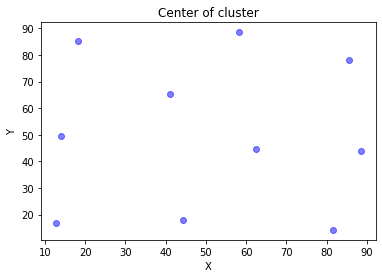

In [122]:
#scatter plot 데이터를 생성
x = x_cen
y = y_cen

plt.scatter(x,y,c='b',alpha= 0.5) #->그래프의 객체 생성
#alpha는 점들의 크기 label은 설명란
#plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 
plt.xlabel('X') #--->x축의 제목
plt.ylabel('Y') #--->y축의 제목
plt.title("Center of cluster") # ---> 그래프 제목

plt.show()  #-> 그래프를 출력

float

# 데이터 분할

In [25]:
index_0 = []
index_1 = []
index_2 = []
index_3 = []
index_4 = []
index_5 = []
index_6 = []
index_7 = []
index_8 = []
index_9 = []
for idx in range (0,1000):
    if y_pred[idx] == 0:
        index_0.append(int(idx))
        
    elif y_pred[idx] == 1:
        index_1.append(int(idx))
        
    elif  y_pred[idx] == 2:
        index_2.append(int(idx))
        
    elif  y_pred[idx] == 3:
        index_3.append(int(idx))  
        
    elif  y_pred[idx] == 4:
        index_4.append(int(idx))     
        
    elif  y_pred[idx] == 5:
        index_5.append(int(idx))  
        
    elif  y_pred[idx] == 6:
        index_6.append(int(idx))
        
    elif  y_pred[idx] == 7:
        index_7.append(int(idx))
        
    elif  y_pred[idx] == 8:
        index_8.append(int(idx))
        
    else:
        index_9.append(int(idx))        
    

In [26]:
#이중배열로 해결해보자
index_total = []
index_total.append(index_0)
index_total.append(index_1)
index_total.append(index_2)
index_total.append(index_3)
index_total.append(index_4)
index_total.append(index_5)
index_total.append(index_6)
index_total.append(index_7)
index_total.append(index_8)
index_total.append(index_9)

In [27]:
print(index_total[5])

[3, 8, 23, 37, 45, 51, 55, 57, 65, 70, 79, 106, 108, 113, 115, 122, 123, 124, 128, 132, 154, 156, 158, 159, 164, 185, 189, 190, 208, 221, 226, 250, 255, 275, 308, 309, 310, 311, 312, 319, 322, 324, 328, 331, 349, 350, 370, 387, 429, 442, 483, 492, 496, 500, 510, 518, 545, 563, 568, 576, 582, 592, 609, 616, 620, 626, 644, 653, 662, 663, 669, 671, 686, 704, 709, 744, 746, 774, 777, 786, 803, 805, 808, 822, 826, 832, 863, 912, 942, 953, 955, 967, 972, 976, 983, 992]


In [28]:
print("index_0 : ",len(index_0), "\n","index_1 : ",len(index_1), "\n","index_2 : ",len(index_2), "\n","index_3 : ",len(index_3), "\n","index_4 : ",len(index_4), "\n",
      "index_5 : ",len(index_5), "\n","index_6 : ",len(index_6), "\n","index_7 : ",len(index_7), "\n","index_8 : ",len(index_8), "\n","index_9 : ",len(index_9))

index_0 :  74 
 index_1 :  87 
 index_2 :  115 
 index_3 :  111 
 index_4 :  100 
 index_5 :  96 
 index_6 :  99 
 index_7 :  106 
 index_8 :  103 
 index_9 :  109


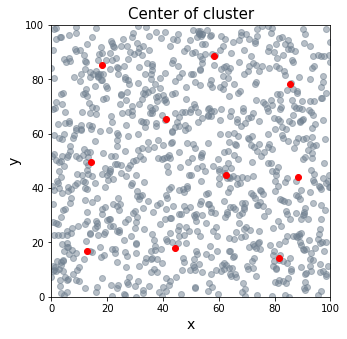

In [29]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Center of cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for idx in range(0,10):
    for m in index_total[idx]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")

plt.scatter(x_cen,y_cen,c='r') # cluster의 center를 빨강으로 표시

plt.show()




# 가시화

In [30]:
print(cities[:5])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214']]


In [31]:
#print(index_0[2])
print(cities[index_0[2]])
print(cities[index_0[2]][0])

['99.08923452539618', '42.495177866695364']
99.08923452539618


In [32]:
print(index_total[5])
count=0
for i in index_total[5]:
    print(cities[i][0])
    count = count+1
    if count== 10:
        break

[3, 8, 23, 37, 45, 51, 55, 57, 65, 70, 79, 106, 108, 113, 115, 122, 123, 124, 128, 132, 154, 156, 158, 159, 164, 185, 189, 190, 208, 221, 226, 250, 255, 275, 308, 309, 310, 311, 312, 319, 322, 324, 328, 331, 349, 350, 370, 387, 429, 442, 483, 492, 496, 500, 510, 518, 545, 563, 568, 576, 582, 592, 609, 616, 620, 626, 644, 653, 662, 663, 669, 671, 686, 704, 709, 744, 746, 774, 777, 786, 803, 805, 808, 822, 826, 832, 863, 912, 942, 953, 955, 967, 972, 976, 983, 992]
52.59628100814437
39.00003159887097
38.34965160669239
41.54042832052344
37.35521899894525
36.796704498332424
42.766535556478615
40.87718714956981
31.608682532297028
45.74127395211243


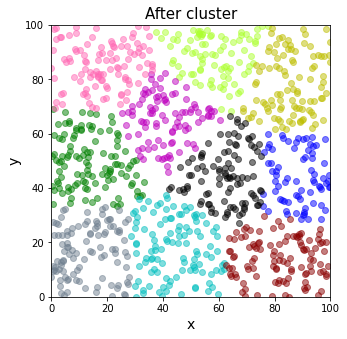

In [33]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

#c = 'b,g,r,c,y,m,k,w'  -> color

#plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
#plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.show()




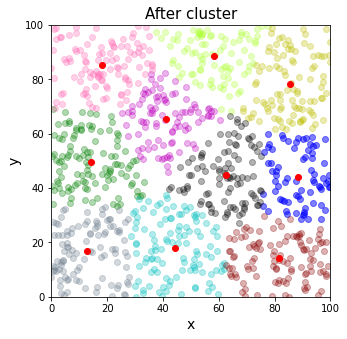

In [34]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="darkred")
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.show()  #-> 그래프를 출력
#c = 'b,g,r,c,y,m,k,w'  -> color



# BFS구현

tree를 직접 구현하기 까다로움     
idea: tree 부분만 handwritting 해보자     
cluster 내부도 알고리즘으로 구현       
내부 + 외부

-----------------------           
center로만 생각 or 정말 이전한 거리 계산

# 1. center로만 생각

In [36]:
print("x_cen : ",x_cen)
print(" ")
print("y_cen : ",y_cen)

x_cen :  [88.42037130458117, 58.20922046693572, 14.042258449623858, 44.21577517172009, 85.56722932350755, 41.18155783460438, 62.45962783030448, 18.296514966325752, 12.769091344992681, 81.54376849253356]
 
y_cen :  [44.01240431021656, 88.58771847724546, 49.62561131982819, 18.071823676164882, 78.14269688808513, 65.45288800495358, 44.73255987086255, 85.16149829697582, 16.82974295845999, 14.222169095356051]


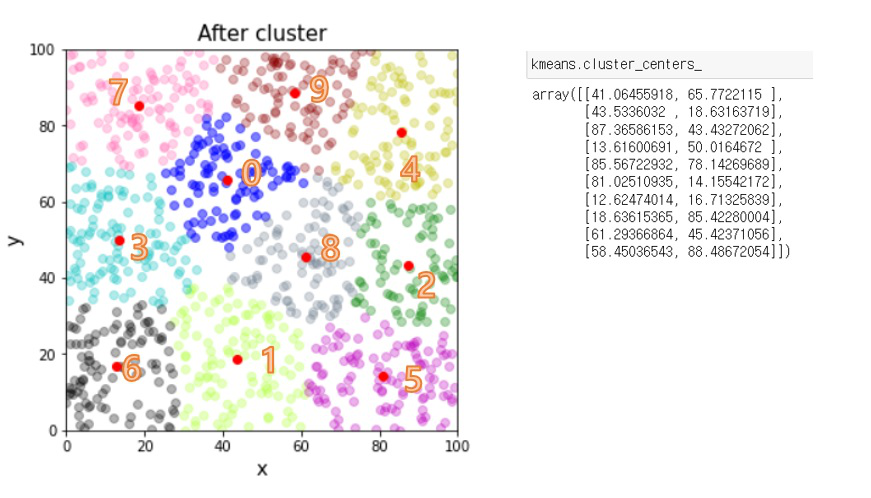

In [406]:
import PIL.Image as pilimg
center_img = pilimg.open('Center_number.jpg')
center_img

In [43]:
kmeans.cluster_centers_

array([[88.4203713 , 44.01240431],
       [58.20922047, 88.58771848],
       [14.04225845, 49.62561132],
       [44.21577517, 18.07182368],
       [85.56722932, 78.14269689],
       [41.18155783, 65.452888  ],
       [62.45962783, 44.73255987],
       [18.29651497, 85.1614983 ],
       [12.76909134, 16.82974296],
       [81.54376849, 14.2221691 ]])

In [40]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

In [407]:
distance(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1])

53.848605070366425

In [408]:
NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = []
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
            pass
cen_dis.append(max(temp_cen_dis))
        

In [409]:
cen_dis

[6]

center 간의 거리를 확인하고 싶으면 아래 코드를 돌리기

In [269]:
for i in range (0,10):
    print("target : ", i)
    for k in range (0,10):
        if(i==k):
            pass
        else:
            print(distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k]))
    

target :  0
53.848605070366425
74.58962236663703
51.253878320582665
34.24934000262012
51.87677552735467
25.970730173961787
81.30561581883155
80.38664837949344
30.573612485137836
target :  1
53.848605070366425
58.89623356365613
71.89094470673797
29.284110445671523
28.725627507544168
44.0606502351654
40.05949381984385
84.93534237979777
77.94059318756283
target :  2
74.58962236663703
58.89623356365613
43.65870618834255
77.00029628395724
31.417260516714656
48.66398678928283
35.789634836953994
32.820571842253244
76.22242176298636
target :  3
51.253878320582665
71.89094470673797
43.65870618834255
72.9277215392746
47.478118452374105
32.30530938207215
71.92240603818271
31.47120411117842
37.52597667949813
target :  4
34.24934000262012
29.284110445671523
77.00029628395724
72.9277215392746
46.16404534928927
40.62263534383592
67.63588236537608
95.17797651093042
64.04703045699647
target :  5
51.87677552735467
28.725627507544168
31.417260516714656
47.478118452374105
46.16404534928927
29.699970719283

In [177]:
#x=[1,2] #=> x1,x2
#y=[3,4] #=> y1,y2
#plt.plot(x,y) #=> (1,3) ~ (2,4)
#plt.show()

target :  0
The nearest node is :  6
target :  1
The nearest node is :  5
target :  2
The nearest node is :  5
target :  3
The nearest node is :  8
target :  4
The nearest node is :  1
target :  5
The nearest node is :  1
target :  6
The nearest node is :  0
target :  7
The nearest node is :  5
target :  8
The nearest node is :  3
target :  9
The nearest node is :  0


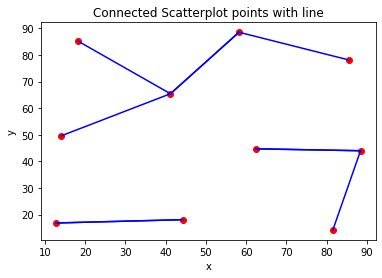

In [410]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
for i in range (0,NUMBER_OF_CLUSTER):
    print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    print("The nearest node is : ",min_index)
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

plt.show()  #-> 그래프를 출력

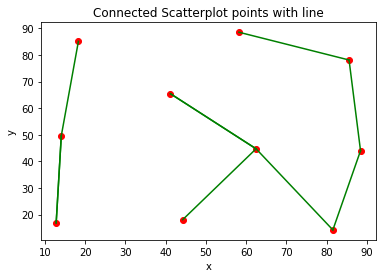

In [168]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center2 = []
for i in range (0,NUMBER_OF_CLUSTER):
    #print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    #print("The nearest node is : ",min_index)
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

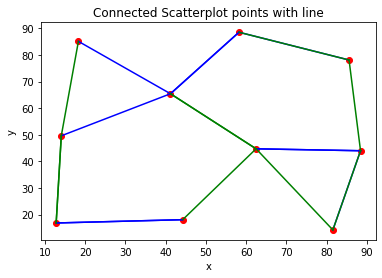

In [172]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
distance_center2 = []

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

In [411]:
ans =[0,9,4,2,5,8,1,6,3,7] #<- 그냥 눈으로 풀었음

In [412]:
distance_center

[6, 5, 5, 8, 1, 1, 0, 5, 3, 0]

In [413]:
distance_center2

[9, 4, 8, 6, 0, 6, 5, 2, 2, 6]

idea : 가장 인접한 곳이 많은 node를 시작 과 종료 node로 잡아보자    
0는 파란색이 많고 8은 초록색이 많으니깐 0를 선택

# BFS

In [416]:
# 0  1  2  3  4  5  6  7  8  9    <-index
#[6, 5, 5, 8, 1, 1, 0, 5, 3, 0]
#[9, 4, 8, 6, 0, 6, 5, 2, 2, 6]
import math

def dist(a,b):
    x = (float(kmeans.cluster_centers_[b][0])-float(kmeans.cluster_centers_[a][0]))
    y = (float(kmeans.cluster_centers_[a][1])-float(kmeans.cluster_centers_[b][1]))  
    
    r = math.sqrt((x * x) + (x* x))
    return r

graph = {
        0: set([6,9,4]),
    1: set([4]),
    2: set([7,8]),
    3: set([8]),
    4: set([0]),
    5: set([1,2,6,7]),
    6: set([0,9,3]),
    7: set([2,5]),
    8: set([3]),
    9: set([0])
    
    #: ([100,100,100,100,dist(0,4),100,dist(0,6),100,100,dist(0,9)]),
    #1: ([100,100,100,100,dist(1,4),dist(1,5),100,100,100,100]),
    #2: ([100,100,100,100,100,dist(2,5),100,dist(2,7),dist(2,8),100]),
    #3: ([100,100,100,100,100,100,dist(3,6),100,dist(3,8),100]),
    #4: ([dist(4,0),dist(4,1),100,100,100,100,100,100,100,100]),
    #5: ([dist(5,1),dist(5,2),100,100,100,dist(5,6),dist(5,7),100,100,100]),
    #6: ([dist(6,0),100,100,dist(6,3),100,dist(6,5),100,100,100,dist(6,9)]),
    #7: ([100,100,dist(7,2),100,100,dist(7,5),100,100,100,100]),
    #8: ([100,100,dist(8,2),dist(8,3),100,100,100,100,100,100]),
    #9: ([dist(9,0),100,100,100,100,100,dist(9,6),100,100,100])
}
#root_node=5

In [417]:
from collections import deque

def bfs(graph, start):
    visited_nodes = []
    adjacency_nodes = deque([start]) 

    while adjacency_nodes:
        node = adjacency_nodes.popleft()
        if node not in visited_nodes: #방문을 하지 않았을 때(예외 처리)
            visited_nodes.append(node) #방문 노드에 추가
            adjacency_nodes.extend(graph[node]) #extend 각각의 요소를 추가

    return visited_nodes


bfs(graph,0) #여기서 출력되는건 최단 경로가 아닌 search 순서 이다

[0, 9, 4, 6, 3, 8]

In [418]:
kmeans.cluster_centers_[i][0]

81.54376849253356

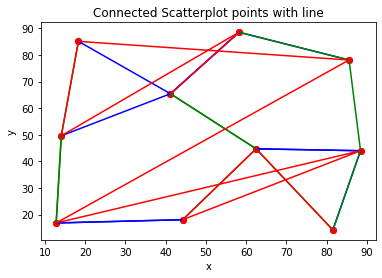

In [419]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
distance_center2 = []

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

    
x_path=[]
y_path=[]

for i in path:
#for i in ans:
    x_path.append(float(kmeans.cluster_centers_[i][0]))
    y_path.append(float(kmeans.cluster_centers_[i][1]))
    
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_path,y_path,c='r')

idea :결국엔 시작 노드와 가까운 순서대로 이동을 하게 되는데 path에 weight 존재    
즉, greedy search와 크게 차이 x

*확장성을 고려하여서 list 구조로 짜보자

In [391]:
mylist=[[6,9,4],[4,5],[5,7,8],[6,8],[0,1],[1,2,6,7],[0,5,9,3],[2,5],[2,3],[6,0]]
print(mylist[7])

[2, 5]


def find_min_idx(node,visited_node):
    min_temp = 100
    for m_node in mylist[node]:
        if(m_node in visited_node):
            pass
        else:
            if(min_temp > distance(kmeans.cluster_centers_[node],kmeans.cluster_centers_[m_node])):
                min_temp = distance(kmeans.cluster_centers_[node],kmeans.cluster_centers_[m_node])
                min_idx = m_node
    if :#예외처리 조건 생각해보기
        pass
    else:
        visited_node.append(min_idx)
    return visited_node

total_node = []
for n in range(0,NUMBER_OF_CLUSTER):    
    total_node.append(n)
    
#[0,1,2,3,4,5,6,7,8,9]
visited_nodes = []

start_node = 5

visited_nodes.append(start_node)
total_node.remove(start_node)

current_node = start_node

while len(total_node) > 0:
    next_node = (find_min_idx(current_node,visited_nodes)).pop()
    visited_nodes.append(next_node)
    total_node.remove(next_node)
    current_node = next_node


visited_node

---------------------------------------------------------------------------------------------------------------------------

위의 경로는 내가 보기 편할려고 짠거지 실제로는 모든 경로 갈 수 있다.

# 일반화

In [405]:
start_node = kmeans.cluster_centers_[5]
current_node = []
next_node = []
a= [88.4,14.5]
b= [24.3,59.3]
#이렇게 가정을 해보고 시작

#current_node에서 가장 가까운 좌표를 구해보자
kmeans.cluster_centers_

array([[88.4203713 , 44.01240431],
       [58.20922047, 88.58771848],
       [14.04225845, 49.62561132],
       [44.21577517, 18.07182368],
       [85.56722932, 78.14269689],
       [41.18155783, 65.452888  ],
       [62.45962783, 44.73255987],
       [18.29651497, 85.1614983 ],
       [12.76909134, 16.82974296],
       [81.54376849, 14.2221691 ]])

In [428]:
y_pred[:25]

array([3, 8, 1, 5, 4, 3, 1, 4, 5, 3, 6, 7, 3, 1, 1, 7, 2, 6, 9, 6, 7, 4,
       6, 5, 0])

In [429]:
pos_0 = [i for i, x in enumerate(y_pred) if x == 0]
print(pos_0)

[24, 32, 35, 36, 41, 42, 54, 63, 67, 71, 102, 138, 162, 163, 174, 175, 180, 211, 232, 234, 236, 240, 242, 247, 252, 283, 287, 292, 314, 326, 356, 378, 385, 395, 423, 435, 436, 441, 453, 459, 485, 507, 536, 551, 567, 573, 587, 589, 596, 612, 625, 643, 649, 657, 660, 668, 681, 695, 714, 747, 763, 790, 795, 833, 835, 858, 861, 874, 885, 910, 928, 936, 943, 977]


In [ ]:
cluster_number = 0
start_node = 
for num in pos_0:
    
        